**DSA104_project: PCA**

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [ ]:
#Load chemistry dataset
compounds_df = pd.read_csv("/Users/riccarda/Desktop/DSA103_DataProject_RW/scripts/classifier_pathway.csv")
compounds_df.head()

,Unnamed: 0,structure_smiles,structure_taxonomy_npclassifier_01pathway,SID,mol,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,C#C/C=C\CCCC#C/C=C/CCCCCCC/C=C\C#C,Fatty acids,S1,<rdkit.Chem.rdchem.Mol object at 0x167925150>,5.138392,0.937871,0.937871,0.332032,10.636364,...,0,0,0,2,0,0,0,0,8,0
1,1,C#C/C=C\CCCC#CCCCCCCCCCCC#C,Fatty acids,S2,<rdkit.Chem.rdchem.Mol object at 0x167925380>,5.223961,0.943318,0.943318,0.309396,9.809524,...,0,0,0,2,0,0,0,0,11,0
2,2,C#C/C=C\CCCCC#CCCCCC#CCCCC#CCO,Fatty acids,S3,<rdkit.Chem.rdchem.Mol object at 0x1679253f0>,8.490439,0.043231,-0.043231,0.492037,9.043478,...,0,0,0,1,0,0,0,0,8,0
3,3,C#CC#CC/C=C/CCCCC/C=C/C(=O)N1CCCCC1,Alkaloids,S4,<rdkit.Chem.rdchem.Mol object at 0x167925460>,11.886906,0.190474,0.190474,0.285907,14.772727,...,0,0,0,1,0,0,0,0,4,0
4,4,C#CC#CC=CC=CC=CCCO,Fatty acids,S5,<rdkit.Chem.rdchem.Mol object at 0x1679254d0>,8.439692,0.188318,0.188318,0.504961,10.461538,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Select only numeric descriptor columns
compounds_df_num = compounds_df.copy().select_dtypes("number")

X = StandardScaler().fit_transform(compounds_df_num) #Standardize the variables

pca = PCA(n_components=2)
PCs = pca.fit_transform(X)

pc_df = pd.DataFrame(PCs, columns=["PC1", "PC2"], index=compounds_df_num.index)

#Extract PC scores
print(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")


PC1 (17.9%)
PC2 (10.6%)


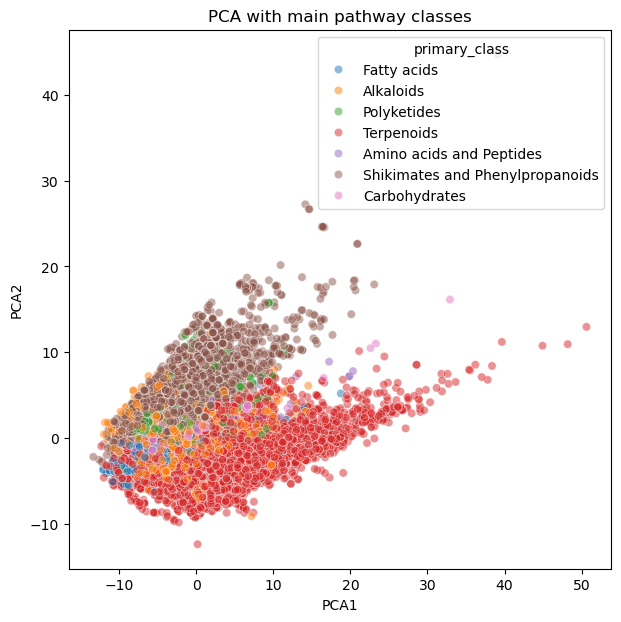

In [ ]:
#Plot PCA 
pc_df = pd.DataFrame(PCs,columns=["PCA1","PCA2"])
pc_df["structure_taxonomy_npclassifier_01pathway"] = compounds_df["structure_taxonomy_npclassifier_01pathway"]
pc_df["primary_class"] = pc_df["structure_taxonomy_npclassifier_01pathway"].str.split("|").str[0]

plt.figure(figsize=[7,7])
sns.scatterplot(data=pc_df,x="PCA1",y="PCA2",hue="primary_class",alpha=0.5)
plt.title("PCA with main pathway classes")
plt.show()


In [ ]:
#Determination which chemical features drive PC1 and PC2
loadings = pd.DataFrame(
    pca.components_.T,         # transpose: features × PCs
    index=compounds_df_num.columns,   
    columns=["PC1", "PC2"]
)

# Sort features by importance for PC1
loadings_PC1 = loadings.sort_values("PC1", ascending=False)

loadings_PC2 = loadings.sort_values("PC2", ascending=False).head(20)

print("loadings PC1")
display(loadings_PC1.head())

print("loadings PC2")
display(loadings_PC2.head())



loadings PC1


,PC1,PC2
NumValenceElectrons,0.163614,0.031264
ExactMolWt,0.162983,0.043588
Chi0,0.161634,0.041857
HeavyAtomCount,0.160974,0.046520
LabuteASA,0.160464,0.035168


loadings PC2


,PC1,PC2
NumAromaticRings,-0.032752,0.193560
fr_benzene,-0.030852,0.193011
NumAromaticCarbocycles,-0.030995,0.192984
SlogP_VSA11,-0.022318,0.190670
SMR_VSA9,-0.025141,0.189598
